<a href="https://colab.research.google.com/github/rezakhanahmadi342341/projects/blob/main/Human%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
# kagglehub.datasets.dataset_download('tapakah68/supervisely-filtered-segmentation-person-dataset')
!kaggle datasets download -d tapakah68/segmentation-full-body-mads-dataset --unzip

mv: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/tapakah68/segmentation-full-body-mads-dataset
License(s): Attribution-NoDerivatives 4.0 International (CC BY-ND 4.0)
 97%|███████████████████████████████████████▋ | 460M/475M [00:01<00:00, 243MB/s]
100%|█████████████████████████████████████████| 475M/475M [00:01<00:00, 261MB/s]


In [ ]:
import glob
images_path = glob.glob('segmentation_full_body_mads_dataset_1192_img/segmentation_full_body_mads_dataset_1192_img/images/*.png')
masks_path =  glob.glob('segmentation_full_body_mads_dataset_1192_img/segmentation_full_body_mads_dataset_1192_img/masks/*.png')

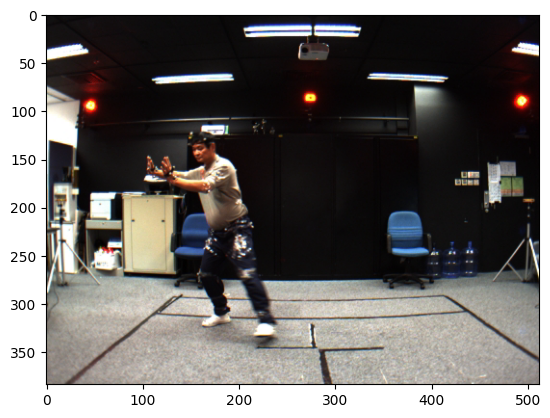

(384, 512, 3)


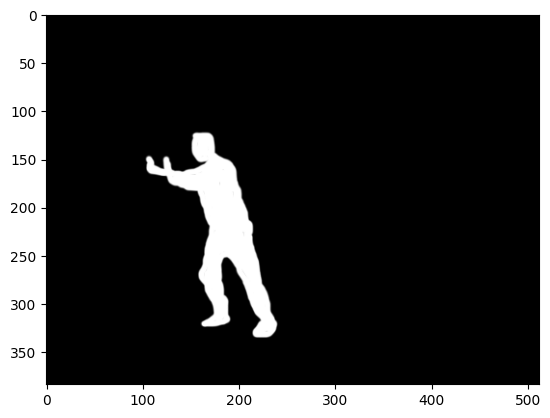

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
num = np.random.randint(1, len(images_path))

img = plt.imread(images_path[num])
plt.imshow(img)
plt.show()
print(img.shape)
img1 = plt.imread(masks_path[num])
plt.imshow(img1)
plt.show()


In [ ]:
import cv2
import numpy as np

images = []
masks = []

# Process images
for i in images_path:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (400, 400))
    img = img / 255.0
    images.append(img)

# Process masks
for i in masks_path:
    mask = cv2.imread(i)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask = cv2.resize(mask, (400, 400))
    mask = mask / 255.0
    masks.append(mask)


images = np.array(images)
masks = np.array(masks)
print(images.shape, masks.shape)

(1192, 400, 400) (1192, 400, 400)


In [ ]:
%config IPCompleter.use_jedi = True

In [ ]:
%config IPCompleter.greedy = True


In [ ]:
images = images.reshape(-1, 400,400, 1)

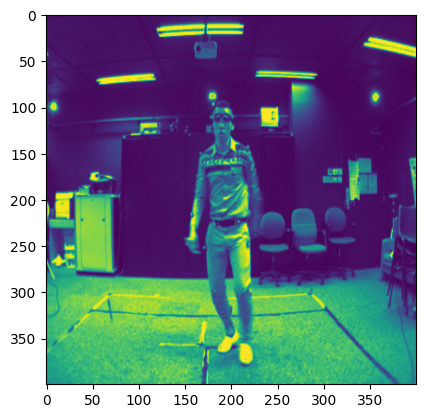

(400, 400)


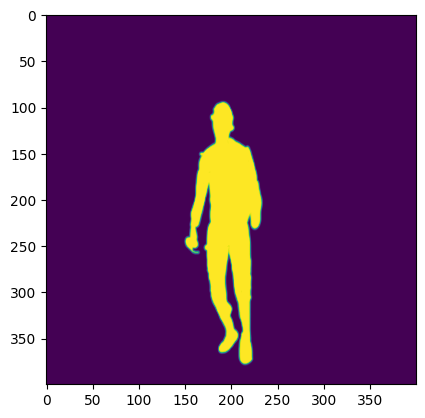

In [ ]:
num = np.random.randint(1, len(images_path))

plt.imshow(images[num])
plt.show()
print(img.shape)
plt.imshow(masks[num])
plt.show()

In [ ]:
images.shape

(1192, 400, 400, 1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model
import tensorflow as tf
from tensorflow.keras import layers, models, mixed_precision
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, masks, test_size=0.1)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def unet():
    # Block one
    input_t = layers.Input(shape=(400, 400, 1))
    con11 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(input_t)
    con12 = layers.BatchNormalization()(con11)
    con13 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(con12)
    con14 = layers.BatchNormalization()(con13)
    con15 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(con14)
    con16 = layers.BatchNormalization()(con15)
    con17 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(con16)
    con18 = layers.BatchNormalization()(con17)
    con19 = layers.MaxPooling2D((2,2))(con18)

    # Block two
    con21 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(con19)
    con22 = layers.BatchNormalization()(con21)
    con23 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(con22)
    con24 = layers.BatchNormalization()(con23)
    con25 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(con24)
    con26 = layers.BatchNormalization()(con25)
    con27 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(con26)
    con28 = layers.BatchNormalization()(con27)
    con29 = layers.MaxPooling2D((2,2))(con28)

    # Block three
    con31 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(con29)
    con32 = layers.BatchNormalization()(con31)
    con33 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(con32)
    con34 = layers.BatchNormalization()(con33)
    con35 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(con34)
    con36 = layers.BatchNormalization()(con35)
    con37 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(con36)
    con38 = layers.BatchNormalization()(con37)
    con39 = layers.MaxPooling2D((2,2))(con38)

    # Block four
    con41 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(con39)
    con42 = layers.BatchNormalization()(con41)
    con43 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(con42)
    con44 = layers.BatchNormalization()(con43)
    con45 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(con44)
    con46 = layers.BatchNormalization()(con45)
    con47 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(con46)
    con48 = layers.BatchNormalization()(con47)
    con49 = layers.MaxPooling2D((2,2))(con48)

    # Block five (Bottleneck)
    con51 = layers.Conv2D(1024, (3,3), activation='relu', padding='same')(con49)
    con52 = layers.BatchNormalization()(con51)
    con53 = layers.Conv2D(1024, (3,3), activation='relu', padding='same')(con52)
    con54 = layers.BatchNormalization()(con53)
    con55 = layers.Conv2D(1024, (3,3), activation='relu', padding='same')(con54)
    con56 = layers.BatchNormalization()(con55)
    con57 = layers.Conv2D(1024, (3,3), activation='relu', padding='same')(con56)
    con58 = layers.BatchNormalization()(con57)

    # Block up one
    con61 = layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(con58)
    con62 = layers.Concatenate()([con48, con61])
    con63 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(con62)
    con16 = layers.BatchNormalization()(con63)
    con65 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(con16)
    con66 = layers.BatchNormalization()(con65)
    con67 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(con66)
    con68 = layers.BatchNormalization()(con67)
    con69 = layers.Conv2D(128, (3,3), activation='relu', padding='same')(con68)
    con610 = layers.BatchNormalization()(con69)

    # Block up two
    con71 = layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(con610)
    con72 = layers.Concatenate()([con38, con71])
    con73 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(con72)
    con74 = layers.BatchNormalization()(con73)
    con75 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(con74)
    con76 = layers.BatchNormalization()(con75)
    con77 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(con76)
    con78 = layers.BatchNormalization()(con77)
    con79 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(con78)
    con710 = layers.BatchNormalization()(con79)

    # Block up three
    con81 = layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(con710)
    con82 = layers.Concatenate()([con28, con81])
    con83 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(con82)
    con84 = layers.BatchNormalization()(con83)
    con85 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(con84)
    con86 = layers.BatchNormalization()(con85)
    con87 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(con86)
    con88 = layers.BatchNormalization()(con87)
    con89 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(con88)
    con810 = layers.BatchNormalization()(con89)

    # Block up four
    con91 = layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(con810)
    con92 = layers.Concatenate()([con18, con91])
    con93 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(con92)
    con94 = layers.BatchNormalization()(con93)
    con95 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(con94)
    con96 = layers.BatchNormalization()(con95)
    con97 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(con96)
    con98 = layers.BatchNormalization()(con97)
    con99 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(con98)
    con910 = layers.BatchNormalization()(con99)

    # Output
    final_conv = layers.Conv2D(1, (1,1), activation='sigmoid', padding='same')(con910)

    model = keras.Model(input_t, final_conv)
    return model

model = unet()
model.summary()
# plot_model(model, to_file='model_plot.png')  # Uncomment if needed

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 400, 400, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 400, 400, 16)   │            160 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 400, 400, 16)   │             64 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 400, 400, 16)   │          2,320 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 400, 400, 16)   │             64 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 400, 400, 16)   │          2,320 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 400, 400, 16)   │             64 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 400, 400, 16)   │          2,320 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 400, 400, 16)   │             64 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 200, 200, 16)   │              0 │ batch_normalization_3… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 200, 200, 32)   │          4,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 200, 200, 32)   │            128 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 200, 200, 32)   │          9,248 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 200, 200, 32)   │            128 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 200, 200, 32)   │          9,248 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 200, 200, 32)   │            128 │ conv2d_6[0][0]         │
│ (BatchNormalization) 

 Total params: 31,752,465 (121.13 MB)

 Trainable params: 31,740,433 (121.08 MB)

 Non-trainable params: 12,032 (47.00 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
class CustomCallback(keras.callbacks.Callback):
    def __init__(self, x_test):
        super().__init__()
        self.x_test = x_test

    def on_epoch_end(self, epoch, logs=None,):
      print('callback started...')
      y_pred = self.model.predict(self.x_test)
      plt.imshow(y_pred[0])
      plt.title(f"Prediction at epoch {epoch + 1}")
      plt.axis('off')
      plt.show()

# c = CustomCallback(x_test[0:1])
# c.set_model(model)
# c.on_epoch_end(epoch = 0)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.9753 - loss: 0.0229callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


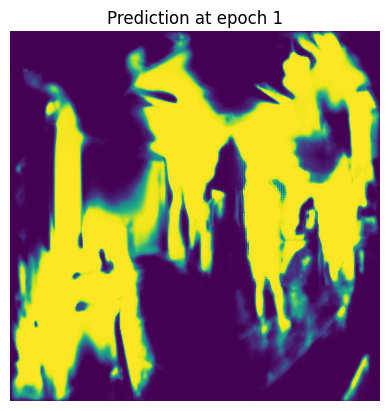

108/108 ━━━━━━━━━━━━━━━━━━━━ 79s 426ms/step - accuracy: 0.9754 - loss: 0.0228 - val_accuracy: 0.6805 - val_loss: 3.0432
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9782 - loss: 0.0124callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


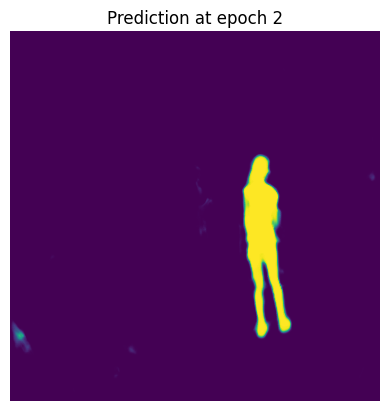

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9783 - loss: 0.0124 - val_accuracy: 0.9788 - val_loss: 0.0148
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.9773 - loss: 0.0113callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


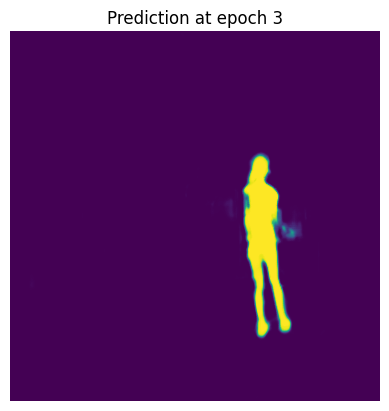

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9774 - loss: 0.0113 - val_accuracy: 0.9760 - val_loss: 0.0230
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.9782 - loss: 0.0113callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


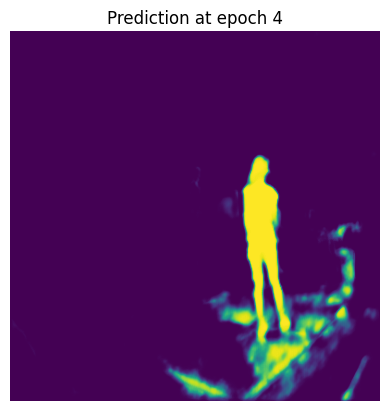

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 275ms/step - accuracy: 0.9782 - loss: 0.0113 - val_accuracy: 0.9379 - val_loss: 0.1140
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.9763 - loss: 0.0144callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


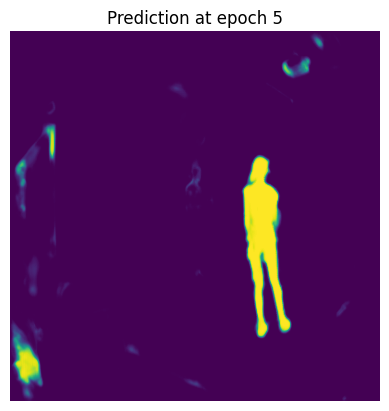

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9763 - loss: 0.0144 - val_accuracy: 0.9770 - val_loss: 0.0190
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9795 - loss: 0.0103callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


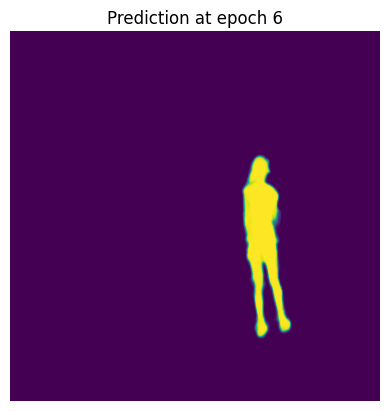

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9795 - loss: 0.0103 - val_accuracy: 0.9800 - val_loss: 0.0105
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9811 - loss: 0.0095callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


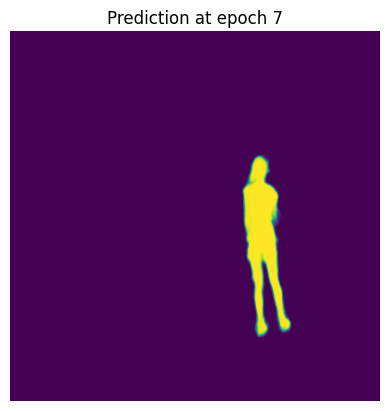

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9810 - loss: 0.0095 - val_accuracy: 0.9800 - val_loss: 0.0107
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9809 - loss: 0.0093callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


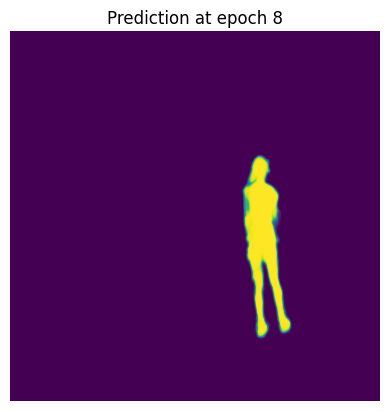

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9808 - loss: 0.0093 - val_accuracy: 0.9800 - val_loss: 0.0110
Epoch 9/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9804 - loss: 0.0090callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


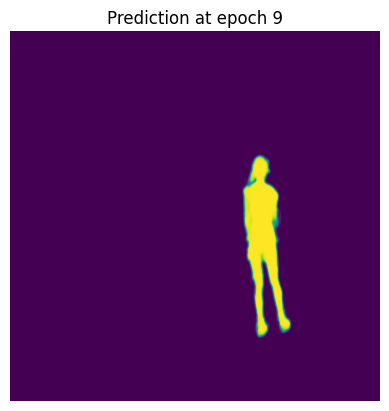

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9803 - loss: 0.0090 - val_accuracy: 0.9801 - val_loss: 0.0102
Epoch 10/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9795 - loss: 0.0090callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


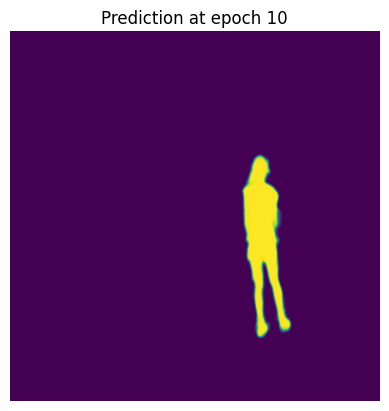

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9795 - loss: 0.0090 - val_accuracy: 0.9800 - val_loss: 0.0103
Epoch 11/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9802 - loss: 0.0086callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


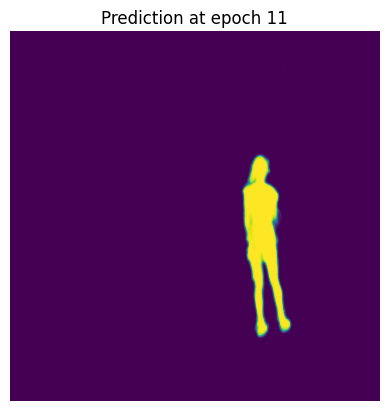

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9802 - loss: 0.0086 - val_accuracy: 0.9802 - val_loss: 0.0099
Epoch 12/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9781 - loss: 0.0088callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


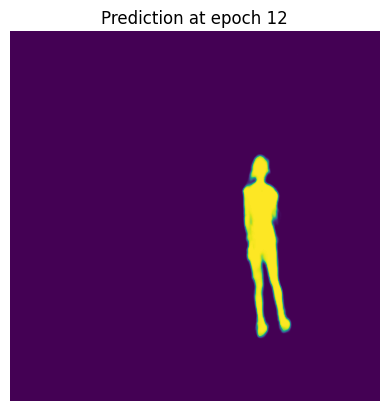

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9782 - loss: 0.0088 - val_accuracy: 0.9801 - val_loss: 0.0103
Epoch 13/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9785 - loss: 0.0085callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


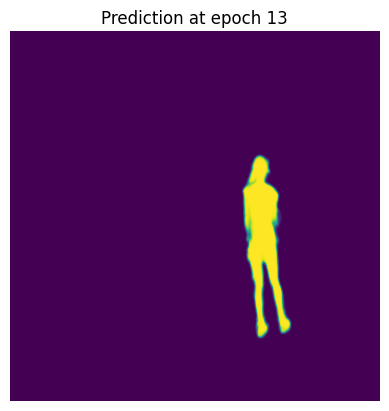

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9785 - loss: 0.0085 - val_accuracy: 0.9801 - val_loss: 0.0100
Epoch 14/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9810 - loss: 0.0088callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


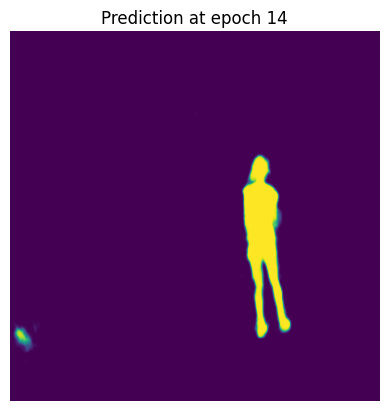

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9810 - loss: 0.0088 - val_accuracy: 0.9790 - val_loss: 0.0136
Epoch 15/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9790 - loss: 0.0086callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


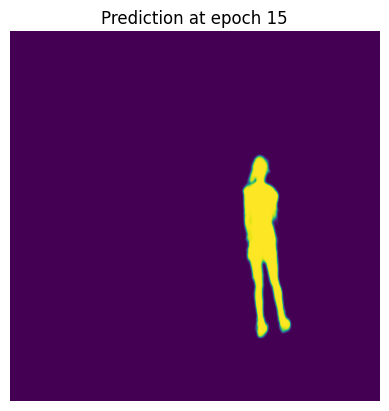

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9790 - loss: 0.0086 - val_accuracy: 0.9803 - val_loss: 0.0094
Epoch 16/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9802 - loss: 0.0082callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


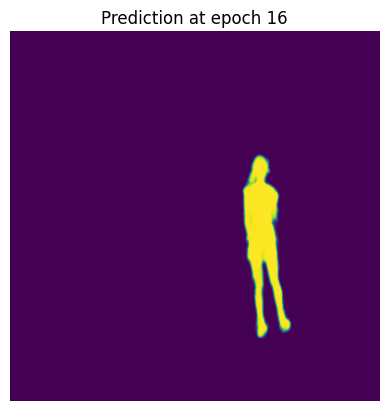

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9802 - loss: 0.0082 - val_accuracy: 0.9802 - val_loss: 0.0097
Epoch 17/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9807 - loss: 0.0079callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


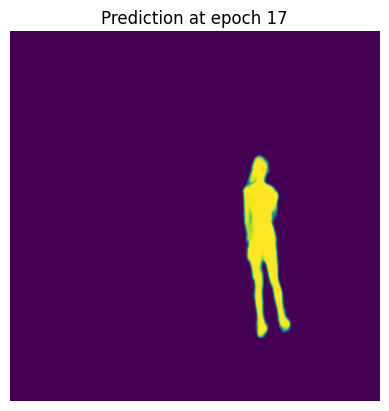

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9807 - loss: 0.0079 - val_accuracy: 0.9801 - val_loss: 0.0100
Epoch 18/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.9757 - loss: 0.0083callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


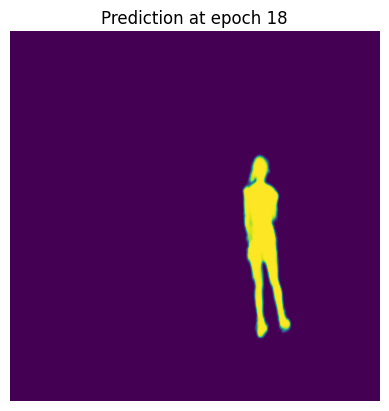

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9758 - loss: 0.0083 - val_accuracy: 0.9800 - val_loss: 0.0114
Epoch 19/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9799 - loss: 0.0078callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


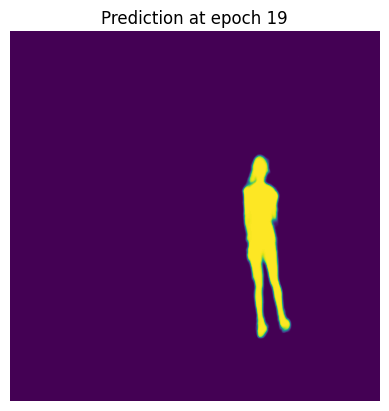

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9799 - loss: 0.0078 - val_accuracy: 0.9803 - val_loss: 0.0091
Epoch 20/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.9788 - loss: 0.0079callback started...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


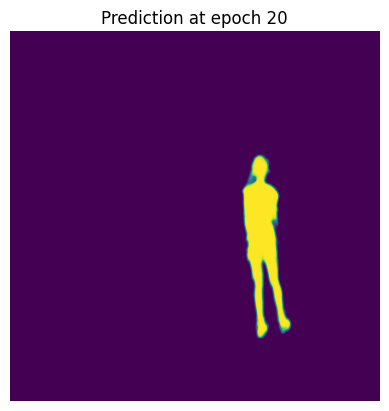

108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.9788 - loss: 0.0079 - val_accuracy: 0.9802 - val_loss: 0.0095


In [ ]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data=[x_test, y_test], callbacks =[CustomCallback(x_test[0:1])])

In [ ]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step


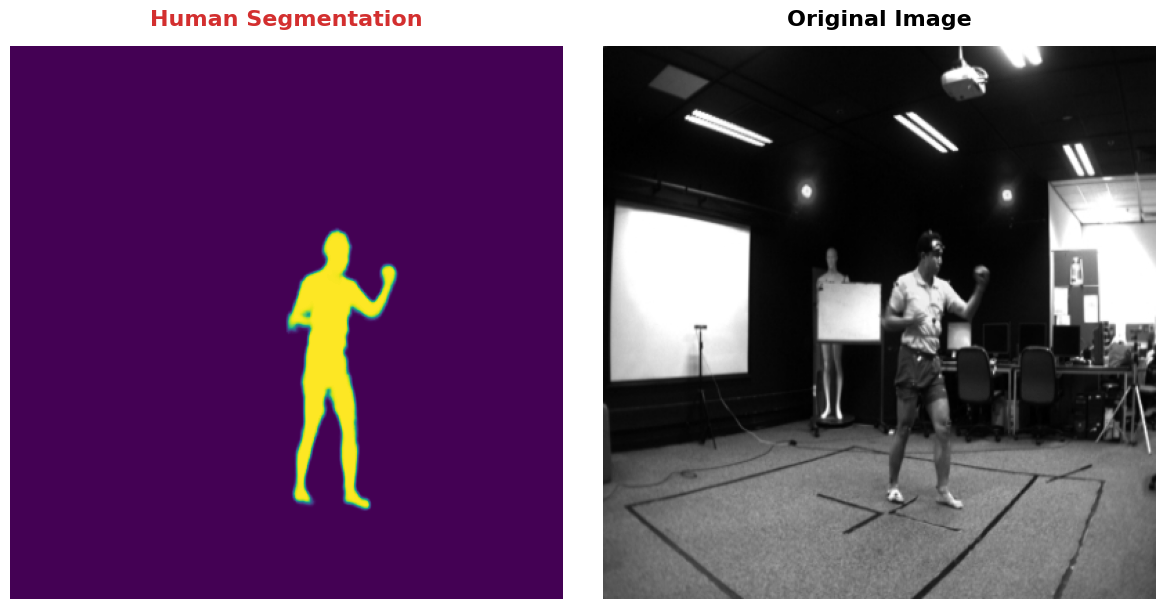

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')


background_color = '#F5F5F5'
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)

segmentation = ax1.imshow(y_pred[10], cmap='viridis')
ax1.set_title('Human Segmentation', fontsize=16, fontweight='bold', color='#D32F2F', pad=15)
ax1.axis('off')

for spine in ax1.spines.values():
    spine.set_edgecolor('#D32F2F')
    spine.set_linewidth(2)

original = ax2.imshow(x_test[10], cmap='gray')
ax2.set_title('Original Image', fontsize=16, fontweight='bold', color='black', pad=15)
ax2.axis('off')

plt.tight_layout()
plt.show()


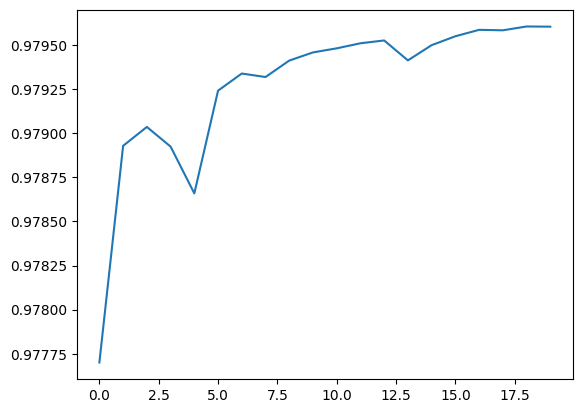

In [ ]:
plt.plot(hist.history['accuracy'])

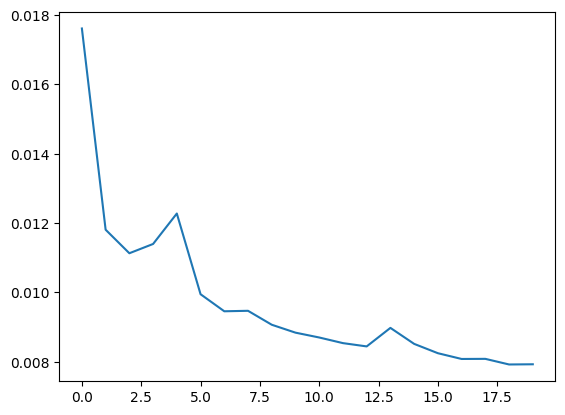

In [ ]:
plt.plot(hist.history['loss'])